# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#189ad3"> Customer_Churn classification

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#189ad3"> Index
    
* Packages
* Data import and null values check
* Exploratory Data Analysis
* Target variable(Attrition_Flag)
* Outliers
* Model - Random forest
* Model Evaluation
* MLPClassifier
* MLP model Evaluation

# Packages

In [ ]:
# Data processing
import numpy as np # linear algebra
import pandas as pd # data processing

# Data visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ML classifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestClassifier

# to split dataset to train and test
from sklearn.model_selection import train_test_split

# ML classifier model Evaluation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Data imputation
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE 

# scaling 
from sklearn.preprocessing import StandardScaler

# pipe
from sklearn.pipeline import Pipeline

# to tune the model parameters
from sklearn.model_selection import RandomizedSearchCV

# Data import and null values check

In [ ]:
df = pd.read_csv('../input/credit-card-customers/BankChurners.csv')

In [ ]:
df = df[['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [ ]:
# quick view of the data set

df.head()

In [ ]:
df.info()

In [ ]:
# null values check

df.isnull().sum()

In [ ]:
# checking for duplicated

sim = df.duplicated() 
sim.sum()

In [ ]:
# This visual check will ensure that there is no null value is replaced with some other value like :- -999,-0.1,-1

for feature in df.columns:
    print('*******','Column name:',feature,'*******')
    print(df[feature].unique())
    print('***********-end-***********')
    print(' ')

# Exploratory Data Analysis

In [ ]:
# stats

round(df.describe(),2)

# Target variable(Attrition_Flag)

In [ ]:
#'Attrition_Flag'
target_df = df['Attrition_Flag'].value_counts().reset_index()
target_df.columns = ['Customer status','Count']
target_df['Percentage'] = target_df['Count'].apply(lambda x: x/target_df['Count'].sum()*100)
print(target_df)

# bar chart
plt.figure(figsize=(8,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')
sns.countplot(df['Attrition_Flag'],palette='rainbow');
plt.title('Number of existing customer and customer who left');

# pie chart
Customer_status = ['Existing Customer','Attrited Customer']

fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size']=15
ax.pie(target_df['Count'], 
       labels=Customer_status, 
        autopct='%1.1f%%',
        shadow=True, startangle=90)
fig.show()


* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> In the above bar chart illustrating the number of the customer with credit card services are 8500 and the number of customers who left the credit card services is 1627

* <span style="font-family: Cambria;font-size:1.2em;color:#333333">  In the above pie chart, we can see the imbalance in target labels and it can cause the problem in the classification so we solve the issue using statistical method Upsampling by SMOTE (Synthetic Minority Over-sampling Technique)

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#189ad3">Customer Age

In [ ]:
bins = [18, 30, 40, 50, 60, 70, 110]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
age = pd.cut(df['Customer_Age'], bins, labels = labels,include_lowest = True)

plt.figure(figsize=(10,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')
sns.countplot(age,palette='winter');
plt.title('Customer who left and their Age');

* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> Most of the customer who left the credit card service is from 40 to 50 age group and most of them are female customers
    

In [ ]:
# Customer Age
left_customer = df[df['Attrition_Flag']=='Attrited Customer']
Existing_Customer = df[df['Attrition_Flag']=='Existing Customer']
# layout
fig, ax = plt.subplots(1,4,figsize=(16,4))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

# plot
sns.boxplot(Existing_Customer['Customer_Age'],color='#05ffa1',ax = ax[0]);
sns.distplot(Existing_Customer['Customer_Age'],ax = ax[1],color='#011efe',kde=False,bins=10);
sns.boxplot(left_customer['Customer_Age'],palette='rainbow',ax = ax[2]);
sns.distplot(left_customer['Customer_Age'],ax = ax[3],color='red',kde=False,bins=10);

# label
ax[0].title.set_text('1.1 Customer Age');
ax[1].title.set_text('1.2 Distribution of customer Age');
ax[2].title.set_text('1.3 Customer who left and their Age');
ax[3].title.set_text('1.4 Distribution of left customer Age');

plt.tight_layout();

print('Stats of Existing Customer Age',round(Existing_Customer['Customer_Age'].describe(),2))
print(' ')
print('Stats of Attrited Customer Age',round(left_customer['Customer_Age'].describe(),2))

* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> In above-left box plot 1.1 illustrates the range of 40 to 50 so most of the credit card customer is in the range of this age

* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> In above-left box plot 1.1 illustrates the age of customers and the median age of 47, the minimum age is 26 and Maximum age is 68

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#189ad3">Gender

In [ ]:
# Gender

plt_Gen = left_customer[['Education_Level','Gender','Attrition_Flag']].groupby(['Education_Level','Gender']).count().reset_index()
plt_Gen = plt_Gen.sort_values('Attrition_Flag')

df_plot = df[['Gender','Attrition_Flag']]
df_plot = df_plot.groupby('Gender')['Attrition_Flag'].count().reset_index()
print(df_plot)

fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.countplot(df['Gender'],palette='tab10',ax =ax[0]);
sns.barplot(x='Gender',y='Attrition_Flag',data=plt_Gen,palette='rainbow',ax=ax[1],ci=False);

ax[0].title.set_text('1.1 Gender of the Existing_Customer');
ax[1].title.set_text('1.2 No. of Customers who left and their gender');


* <span style="font-family: Cambria;font-size:1.2em;color:#333333">  In the above figure, 1.1 bar plot shows the Gender and number of customers using credit card service, of that 5358 are female customers and 4769 are male customers
* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> In the above-right figure, 1.2 bar plot illustrates the number of customers who left the credit card service


## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#189ad3">Education level

In [ ]:
# Education level 
pl = left_customer[['Education_Level','Gender','Attrition_Flag']].groupby(['Education_Level','Gender']).count().reset_index()
pl = pl.sort_values('Attrition_Flag')

# plot data
plot_edu = df['Education_Level'].value_counts().reset_index()
plot_edu.columns =['Education_level','Count']
plot_edu = plot_edu.sort_values('Count')

# plot
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.barplot(x='Count',y='Education_level',data=plot_edu, palette='spring', ax=ax[0]);
sns.barplot(x='Attrition_Flag',y='Education_Level',hue='Gender', data=pl,palette='spring_r', ax=ax[1])

# label
ax[0].title.set_text('1.1 Education_Level of the Customers');
ax[1].title.set_text('1.2 Customers who left and their Education level and gender');
plt.tight_layout()


* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> In the above figure, 1.1 bar plot shows the customer of credit card service and their education level and most of them are from Graduate level

* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> In the above figure, 1.2 bar plot shows the customer who left the credit card service and their education level and their gender

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#189ad3">Marital_Status

In [ ]:
# Marital Status of customers
plot_ms_left = left_customer[['Marital_Status','Gender','Attrition_Flag']].groupby(['Marital_Status','Gender']).count().reset_index()
plot_ms_left.columns = ['Marital_Status','Gender','count']
plot_ms_left = plot_ms_left.sort_values('count')

plot_ms = df[['Marital_Status','Gender','Attrition_Flag']].groupby(['Marital_Status','Gender']).count().reset_index()
plot_ms.columns = ['Marital_Status','Gender','count']
plot_ms = plot_ms.sort_values('count')

# plot
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.barplot(y='count',x='Marital_Status',data=plot_ms, palette='winter', ax=ax[0],ci=False);
sns.barplot(x='count',y='Marital_Status',hue='Gender', data=plot_ms_left,palette='winter', ax=ax[1])


# title
ax[0].title.set_text('Marital Status of customer');
ax[1].title.set_text('Customer who left and their Marital status and Gender');

plt.tight_layout()


## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#189ad3">Income_Category

In [ ]:
# Income category

# plot data
plot_income_left = left_customer[['Income_Category','Gender','Attrition_Flag']].groupby(['Income_Category','Gender']).count().reset_index()
plot_income_left.columns = ['Income_Category','Gender','count']
#plot_income_left = plot_income_left.sort_values('count')

plot_income = df[['Income_Category','Gender','Attrition_Flag']].groupby(['Income_Category','Gender']).count().reset_index()
plot_income.columns = ['Income_Category','Gender','count']
#plot_income = plot_income.sort_values('count')

# plot
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.barplot(x='count',y='Income_Category',data=plot_income, palette='winter', ax=ax[0],ci=False);
sns.barplot(x='count',y='Income_Category', data=plot_income_left,palette='spring',hue='Gender', ax=ax[1],ci=False);

# title
ax[0].title.set_text('1.1 Income category of customer');
ax[1].title.set_text('1.2 Customer who left and their income category and Gender');

plt.tight_layout()


* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> In the above bar plot 1.1 shows the income category of the customer and most of them are customer falls in less than $40000 category

* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> In the above bar plot, 1.2 shows the income category of the customer who left the credit card service and Gender

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#189ad3">Card_Category

In [ ]:
# plot data
plot_card_left = left_customer[['Card_Category','Gender','Attrition_Flag']].groupby(['Card_Category','Gender']).count().reset_index()
plot_card_left.columns = ['Card_Category','Gender','count']
#plot_income_left = plot_income_left.sort_values('count')

plot_card = df['Card_Category'].value_counts().reset_index()
plot_card.columns = ['Card_Category','count']


# plot
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.barplot(y='count',x='Card_Category',data=plot_card, palette='spring', ax=ax[0],ci=False);
sns.barplot(x='count',y='Card_Category', data=plot_card_left,hue='Gender',palette='winter', ax=ax[1],ci=False);

# title
ax[0].title.set_text('Credit Card Category of customers');
ax[1].title.set_text('Customer who left and their Credit card type');

plt.tight_layout()

print('*************************************')
print('Customer who left and their card type')
print('*************************************')
print(plot_card_left)
print('*************************************')

* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> In the above bar plot, 1.1 shows credit type of card customer are belongs to and most of them are using Blue
    
* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> In the above bar plot, 1.2 illustrates credit type of card customer who left and most of them are female customers

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#189ad3">Credit_Limit

In [ ]:
# plot data

# plot
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.distplot(df.Credit_Limit,bins=5,color='red',ax=ax[0],kde=False);
sns.boxplot(left_customer.Credit_Limit,palette='muted', ax=ax[1]);

# title
ax[0].title.set_text('1.1 Credit_Limit of customers');
ax[1].title.set_text('1.2 Customer who left and their Credit card Limit');

plt.tight_layout()

print('*************************************')
print('Credit limit')
print('*************************************')
print(df.Credit_Limit.describe())
print('*************************************')
print('Customer who left and their credit limit')
print('*************************************')
print(left_customer.Credit_Limit.describe())
print('*************************************')

* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> In the above figure, 1.2 box plot shows the customer who left the credit card service and credit limit in average is 8136 and median of 4178
    


In [ ]:
plt.figure(figsize=(15,8))
sns.set_context(context='notebook',font_scale=.8)
sns.heatmap(df.corr(method='pearson'),cmap='Blues',annot=True);
plt.tight_layout()

In [ ]:
# drop the unknown class because of the decision tree will treat that as a class which we don't want

df = df[~df['Education_Level'].str.contains('Unknown')] 
df = df[~df['Marital_Status'].str.contains('Unknown')]
df = df[~df['Income_Category'].str.contains('Unknown')]

In [ ]:
# converting object into the Categorical

for feature in df.columns:
    if df[feature].dtype =='object':
        df[feature] = pd.Categorical(df[feature]).codes

# Outliers

In [ ]:
# outlier

plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');


In [ ]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

In [ ]:
outlier_list = ['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']

In [ ]:
for i in df[outlier_list]:
    df[i]=treat_outlier(df[i])

In [ ]:
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier treated in df');

In [ ]:
X = df[['Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

y = df.pop('Attrition_Flag')

In [ ]:
# spliting the data

X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.30,random_state=0)

# SMOTE over_sampling

* <span style="font-family: Cambria;font-size:1.2em;color:#333333">SMOTE over_sampling techniques used to adjust the class distribution of a data set

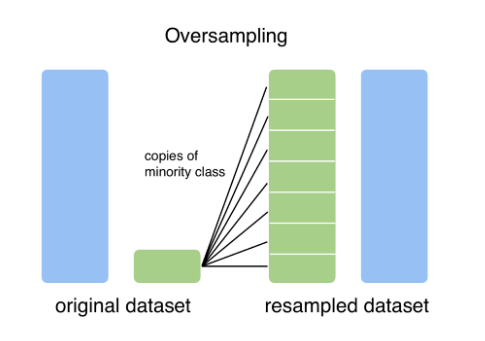

Image credit: medium.com

In [ ]:
# over_sampling train labels

OS_SMOTE = SMOTE()

X_train, train_labels = OS_SMOTE.fit_resample(X_train,train_labels)

In [ ]:
oversample_plot = train_labels.value_counts().reset_index()
oversample_plot.columns = ['Labels','Attrition_Flag']
print(oversample_plot)
sns.barplot(x='Labels',y='Attrition_Flag',data=oversample_plot);
plt.title('Attrition_Flag after upsampling');

# Model - Random forest

In [ ]:
rf_pipe = Pipeline(steps =[ ('std_scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=0)) ])
rf_pipe.fit(X_train,train_labels)

dt_pipe = Pipeline(steps =[ ('_std_scale',StandardScaler()), ("DT",DecisionTreeClassifier(criterion='gini',max_features=10, max_depth=10, min_samples_leaf=15, min_samples_split=100,random_state=0)) ])
dt_pipe.fit(X_train,train_labels)

In [ ]:
rf_train_predict = rf_pipe.predict(X_train)
rf_test_predict = rf_pipe.predict(X_test)


dt_train_predict = dt_pipe.predict(X_train)
dt_test_predict = dt_pipe.predict(X_test)

In [ ]:
# feature_importances

feature_importances = pd.Series(rf_pipe.steps[1][1].feature_importances_, index=X_train.columns);
feature_importances.nlargest(15).plot(kind='barh');
plt.style.use('fivethirtyeight')
plt.title('Random forest feature_importances');

# Model Evaluation

In [ ]:
print("Random forest Recall is ", recall_score(test_labels, rf_test_predict) *  100)
print("Random forest Precision is ", precision_score(test_labels, rf_test_predict) *  100)
print("Random forest Accuracy is ", accuracy_score(test_labels, rf_test_predict) *100)

In [ ]:
print("Decision tree Accuracy is ", accuracy_score(test_labels, dt_test_predict) *  100)
print("Decision tree Recall is ", recall_score(test_labels, dt_test_predict) *  100)
print("Decision tree Precision is ", precision_score(test_labels, dt_test_predict) *  100)

In [ ]:
print('classification_report on test set for RF')
print(' ')
print(classification_report(test_labels, rf_test_predict))


In [ ]:

print('classification_report on train set for RF')
print(' ')
print(classification_report(train_labels, rf_train_predict))


# Fine Tune the model

In [ ]:
# to get best parameters

# fine Tune the model using GridSearchCV

parameters= {'n_estimators':[500,600],
            'max_depth':[10,15,20],
            'max_features':[5,10],
            'min_samples_split' : [100, 110, 200],
            'min_samples_leaf' : [30, 40,60]}


rf = RandomForestClassifier()

rf_model = ms.GridSearchCV(rf, param_grid = parameters, cv=3)

rf_model.fit(X_train,train_labels)


In [ ]:
print('The best parameters are: ',rf_model.best_params_)

In [ ]:
rf_pipe = Pipeline(steps =[ ('std_scale',StandardScaler()), 
                           ("RF",RandomForestClassifier(max_depth=10, max_features= 5, min_samples_leaf=30, min_samples_split= 100, n_estimators= 500
                                                        )) ])


rf_pipe.fit(X_train,train_labels)

In [ ]:
rf_train_predict = rf_pipe.predict(X_train)
rf_test_predict = rf_pipe.predict(X_test)

In [ ]:
print('classification_report on test set')
print(' ')
print(classification_report(test_labels, rf_test_predict))

In [ ]:
print('classification_report on train_set')
print(' ')
print(classification_report(train_labels, rf_train_predict))

* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> Accuracy measures when the model predicts that a customer will churn, it is correct around 94% of the times

* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> Precision is a measure of Customers that we correctly identify that Customer will churn, out of really churned customers

* <span style="font-family: Cambria;font-size:1.2em;color:#333333"> Recall measure of our model correctly identifying True Positives, in other words, the model predicted customer churn how many are really churned

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#189ad3"> Confusion Matrix

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.heatmap(confusion_matrix(train_labels,rf_train_predict),annot=True,fmt='d',linecolor='white',linewidths=1);
sns.set_context(context='notebook',font_scale=1.5)
ax.set_xticklabels(['Not Churn','Churn'],fontsize=14)
ax.set_yticklabels(['Predicted Not Churn','Predicted Churn'],fontsize=14)
plt.title('Confusion Matrix on train set')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.heatmap(confusion_matrix(test_labels,rf_test_predict),annot=True,fmt='d',linecolor='white',linewidths=1);
sns.set_context(context='notebook',font_scale=1.5)
ax.set_xticklabels(['Not Churn','Churn'],fontsize=14)
ax.set_yticklabels(['Predicted Not Churn','Predicted Churn'],fontsize=14)
plt.title('Confusion Matrix on test set')
plt.tight_layout()
plt.show()

# MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

# Scaling data
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

# mlpclassifier
mlpcl = MLPClassifier(hidden_layer_sizes =360,max_iter=5000,
                   solver='sgd',verbose=True, random_state=1,tol=0.0001)

# fit the model
mlpcl.fit(x_train,train_labels)


In [ ]:
mlpcl_train_predict = mlpcl.predict(x_train)
mlpcl_test_predict = mlpcl.predict(x_test)

In [ ]:
print('classification for mlp on train data')

print(classification_report(train_labels,mlpcl_train_predict))

In [ ]:
print('classification for mlp on test data')

print(classification_report(test_labels,mlpcl_test_predict))

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.heatmap(confusion_matrix(test_labels,mlpcl_test_predict),annot=True,fmt='d',linecolor='white',linewidths=1);
sns.set_context(context='notebook',font_scale=1.5)
ax.set_yticklabels(['Not Churn','Churn'],fontsize=14)
ax.set_xticklabels(['Predicted Not Churn','Predicted Churn'],fontsize=14)
plt.title('Confusion Matrix on test set')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.heatmap(confusion_matrix(train_labels,mlpcl_train_predict),annot=True,fmt='d',linecolor='white',linewidths=1);
sns.set_context(context='notebook',font_scale=1.5)
ax.set_yticklabels(['Not Churn','Churn'],fontsize=14)
ax.set_xticklabels(['Predicted Not Churn','Predicted Churn'],fontsize=14)
plt.title('Confusion Matrix on train set')
plt.tight_layout()
plt.show()

In [ ]:
print("Decision tree Accuracy is ", accuracy_score(test_labels, dt_test_predict) *  100)
print("Decision tree Recall is ", recall_score(test_labels, dt_test_predict) *  100)
print("Decision tree Precision is ", precision_score(test_labels, dt_test_predict) *  100)

print(' ')

print("Random forest Recall is ", recall_score(test_labels, rf_test_predict) *  100)
print("Random forest Accuracy is ", accuracy_score(test_labels, rf_test_predict) *100)
print("Random forest Precision is ", precision_score(test_labels, rf_test_predict) *  100)

print(' ')


print("MLPClassifier Recall is ", recall_score(test_labels,mlpcl_test_predict) *  100)
print("MLPClassifier Accuracy is ", accuracy_score(test_labels,mlpcl_test_predict) *100)
print("MLPClassifier Precision is ", precision_score(test_labels,mlpcl_test_predict) *  100)

## Thanks for taking the time to visit my notebook!

## upvote if you like it

## feel free to post any suggestion. 